In [5]:
import pandas as pd
import numpy as np

# Nastavení náhodného seedu pro reprodukovatelnost
np.random.seed(42)

# Generování ukázkových dat pro dotazníkové šetření
n_responses = 1000

# Demografické proměnné
age = np.random.randint(18, 70, size=n_responses)
gender = np.random.choice([0, 1], size=n_responses) # 0 = Muž, 1 = Žena
education = np.random.choice([1, 2, 3], size=n_responses)  # 1 = Primary, 2 = Secondary, 3 = Tertiary
city_size = np.random.choice([1, 2, 3], size=n_responses)  # 1 = Small, 2 = Medium, 3 = Large

# Odpovědi na otázky
question1 = np.random.randint(1, 6, size=n_responses)  # Škála 1-5
question2 = np.random.choice([1, 0], size=n_responses) # 1 = Ano, 0 = Ne
question3 = np.random.normal(50, 10, size=n_responses)

# Vytvoření DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Education': education,
    'City_Size': city_size,
    'Question1': question1,
    'Question2': question2,
    'Question3': question3
})

# Uložení dat do CSV souboru
data.to_csv('../data/survey_data.csv', index=False)

In [6]:
from scipy import stats

def check_anova_assumptions(data):
    # Předpoklad: Normalita dat
    # Test Shapiro-Wilk
    _, shapiro_p = stats.shapiro(data)
    if shapiro_p > 0.05:
        print("Data mají normální rozdělení (Shapiro-Wilk test, p = {:.4f})".format(shapiro_p))
    else:
        print("Data nemají normální rozdělení (Shapiro-Wilk test, p = {:.4f})".format(shapiro_p))

    # Předpoklad: Homoskedasticita

check_anova_assumptions(data)

Data nemají normální rozdělení (Shapiro-Wilk test, p = 0.0000)


/home/petka/PROJECTS/KMA-SZZ/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7000.



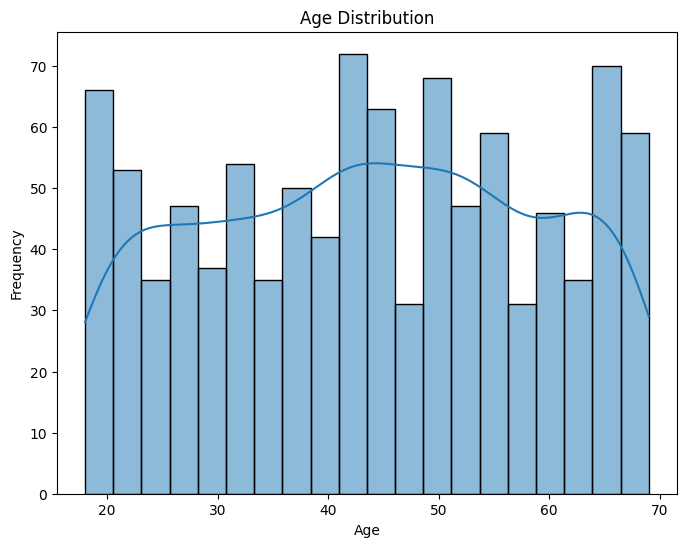

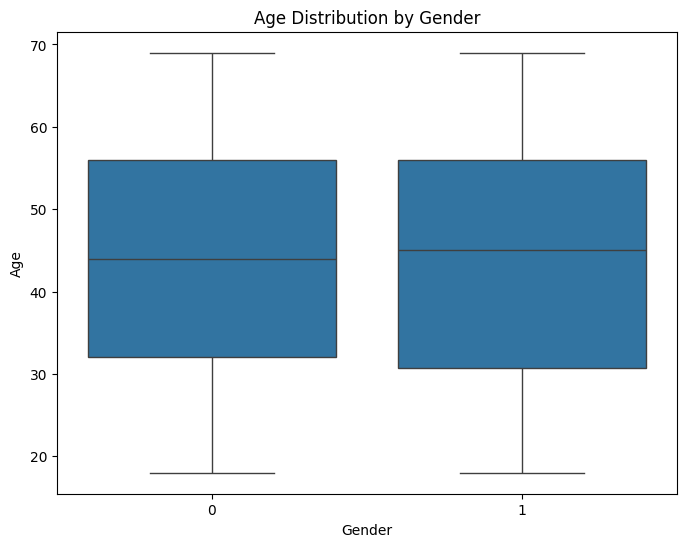

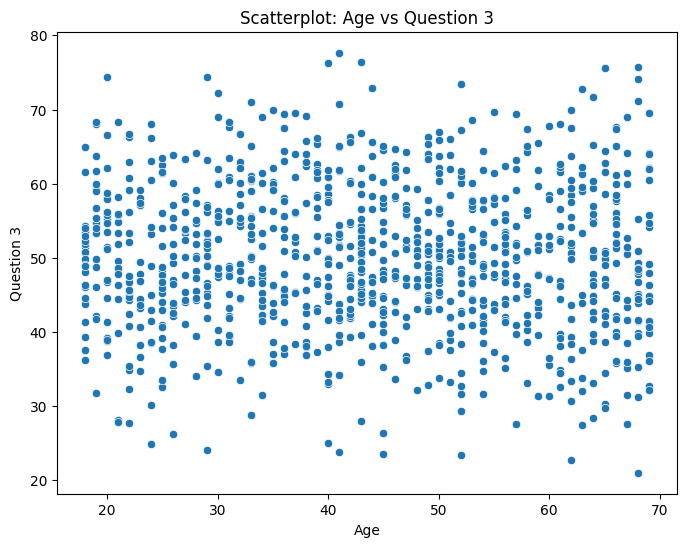

ANOVA results for Question 1 by Education:
F_onewayResult(statistic=nan, pvalue=nan)
Kruskal-Wallis results for Question 1 by Education:
KruskalResult(statistic=nan, pvalue=nan)
Confidence Interval for Age Mean:
(42.8887363676189, 44.74926363238111)


/home/petka/PROJECTS/KMA-SZZ/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning:

at least one input has length 0



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Načtení dat
data = pd.read_csv('../data/survey_data.csv')

# 2) Explorační analýza dat
# Prozkoumání vztahů mezi proměnnými a demografickými faktory pomocí Seaborn

# Histogram věku
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot věku podle pohlaví
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=data)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Scatterplot mezi věkem a odpovědí na otázku 3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Question3', data=data)
plt.title('Scatterplot: Age vs Question 3')
plt.xlabel('Age')
plt.ylabel('Question 3')
plt.show()

# 3) Formulace statistických hypotéz
# Hypotéza: Existuje rozdíl ve skóre otázky 1 mezi různými vzděláními.

# 4) Testování statistických hypotéz
# Analýza rozptylu (ANOVA)
anova_result = stats.f_oneway(data[data['Education'] == 'Primary']['Question1'],
                               data[data['Education'] == 'Secondary']['Question1'],
                               data[data['Education'] == 'Tertiary']['Question1'])
print("ANOVA results for Question 1 by Education:")
print(anova_result)

# Neparametrický Kruskal-Wallis test pro srovnání vzdělání a otázky 1
kruskal_result = stats.kruskal(data[data['Education'] == 'Primary']['Question1'],
                                data[data['Education'] == 'Secondary']['Question1'],
                                data[data['Education'] == 'Tertiary']['Question1'])
print("Kruskal-Wallis results for Question 1 by Education:")
print(kruskal_result)

# Interval spolehlivosti pro průměr věku
age_mean_ci = stats.t.interval(0.95, len(data['Age']) - 1, loc=np.mean(data['Age']), scale=stats.sem(data['Age']))
print("Confidence Interval for Age Mean:")
print(age_mean_ci)

# 5) Komentovaný report
# V tomto bodě bychom vytvořili report obsahující výsledky a interpretace z kroků 2, 4 a 5.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

# Načtení dat
data = pd.read_csv('../data/survey_data.csv')

# 2) Explorační analýza dat
# Prozkoumání vztahů mezi proměnnými a demografickými faktory pomocí Seaborn

# Histogram věku
# fig = px.histogram(data, x='Age', nbins=20, title='Age Distribution', labels={'Age': 'Age', 'count': 'Frequency'})
# fig.show()
bar_data = data['Age'].value_counts().reset_index()
fig = px.bar(bar_data, x='Age', y='count', title='Age Distribution', labels={'index': 'Age', 'Age': 'Frequency'})
fig.show()

# Boxplot věku podle pohlaví
fig = px.box(data, x='Gender', y='Age', title='Age Distribution by Gender', labels={'Gender': 'Gender', 'Age': 'Age'})
fig.show()

# Scatterplot mezi věkem a odpovědí na otázku 3
fig = px.scatter(data, x='Age', y='Question3', title='Scatterplot: Age vs Question 3', labels={'Age': 'Age', 'Question3': 'Question 3'})
fig.show()

# 3) Formulace statistických hypotéz
# Hypotéza: Existuje rozdíl ve skóre otázky 1 mezi různými vzděláními.

# 4) Testování statistických hypotéz
# Analýza rozptylu (ANOVA)
anova_result = stats.f_oneway(data[data['Education'] == 'Primary']['Question1'],
                               data[data['Education'] == 'Secondary']['Question1'],
                               data[data['Education'] == 'Tertiary']['Question1'])
print("ANOVA results for Question 1 by Education:")
print(anova_result)

# Neparametrický Kruskal-Wallis test pro srovnání vzdělání a otázky 1
kruskal_result = stats.kruskal(data[data['Education'] == 'Primary']['Question1'],
                                data[data['Education'] == 'Secondary']['Question1'],
                                data[data['Education'] == 'Tertiary']['Question1'])
print("Kruskal-Wallis results for Question 1 by Education:")
print(kruskal_result)

# Interval spolehlivosti pro průměr věku
age_mean_ci = stats.t.interval(0.95, len(data['Age']) - 1, loc=np.mean(data['Age']), scale=stats.sem(data['Age']))
print("Confidence Interval for Age Mean:")
print(age_mean_ci)

# 5) Komentovaný report
# V tomto bodě bychom vytvořili report obsahující výsledky a interpretace z kroků 2, 4 a 5.



ANOVA results for Question 1 by Education:
F_onewayResult(statistic=nan, pvalue=nan)
Kruskal-Wallis results for Question 1 by Education:
KruskalResult(statistic=nan, pvalue=nan)
Confidence Interval for Age Mean:
(42.8887363676189, 44.74926363238111)


/home/petka/PROJECTS/KMA-SZZ/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning:

at least one input has length 0

